## Applied Data Science 1-Assignment 2
#### Topic : 

In [4]:
# importing dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Using dataframe loading dataset and displaying first few entries using the head

data= pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
#Validating if there is NaN or null values in dataset

print(data.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


### Statistical analysis

In [57]:
def calculate_statistics(data):
    """
    Calculate the mean, median, and standard deviation for numeric columns.   
    
    """
    # By using numpy module selecting only numeric columns in dataset
    num_df = data.select_dtypes(include=[np.number])
    
    # Calculate mean, median, and standard deviation for the nunerical columns derived
    statistics_analysis = {
        "mean": num_df.mean(),
        "median": num_df.median(),
        "standard deviation": num_df.std(),
        "skewness": num_df.skew(),
        "kurtosis": num_df.kurt()
    }
    
    # The statistics is obtained has dictonary,converting dictonary to readable dataframe 
    statics_df = pd.DataFrame(statistics_analysis)
    
    return statics_df

In [59]:
calculate_statistics(data)

,mean,median,standard deviation,skewness,kurtosis
child_mort,38.270060,19.30,40.328931,1.450774,1.766882
exports,41.108976,35.00,27.412010,2.445824,10.138666
health,6.815689,6.32,2.746837,0.705746,0.694196
imports,46.890215,43.30,24.209589,1.905276,6.755854
income,17144.688623,9960.00,19278.067698,2.231480,7.028657
inflation,7.781832,5.39,10.570704,5.154049,41.742502
life_expec,70.555689,73.10,8.893172,-0.970996,1.151591
total_fer,2.947964,2.41,1.513848,0.967092,-0.186779
gdpp,12964.155689,4660.00,18328.704809,2.218051,5.527891


### PIE-Chart: Categorizing Countries Based on GDP per Capita Distribution

In [74]:
def distribution_of_gdp_plot(data):
    """
    Creates a pie chart that displays the distribution after classifying
    country into "Low GDP," "Medium GDP," and "High GDP" groups according
    to their GDP per capita.
    """
    # Intializing the counter for gdp category
    gdp_low_count = 0
    gdp_medium_count = 0
    gdp_high_count = 0

    # performing categorization based on gdp
    for gdp in data['gdpp']:
        if gdp < 5000:
            gdp_low_count += 1
        elif 5000 <= gdp <= 12000:
            gdp_medium_count += 1
        else:
            gdp_high_count += 1

    # Create a dictionary to hold the counts of each category
        gdp_category_counts = {
            'Low GDP': gdp_low_count,
            'Medium GDP': gdp_medium_count,
            'High GDP': gdp_high_count
        }

    # Plot the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(
        gdp_category_counts.values(),
        labels=['Low GDP (<5000)','Medium GDP(between 5000 to 12000)','High GDP (>12000)'],
        autopct='%1.1f%%',
        startangle=140,
        colors=['lightblue', 'lightgreen', 'salmon'],
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
    )
    plt.title('Categorizing Countries Based on GDP per Capita Distribution')
    plt.show()

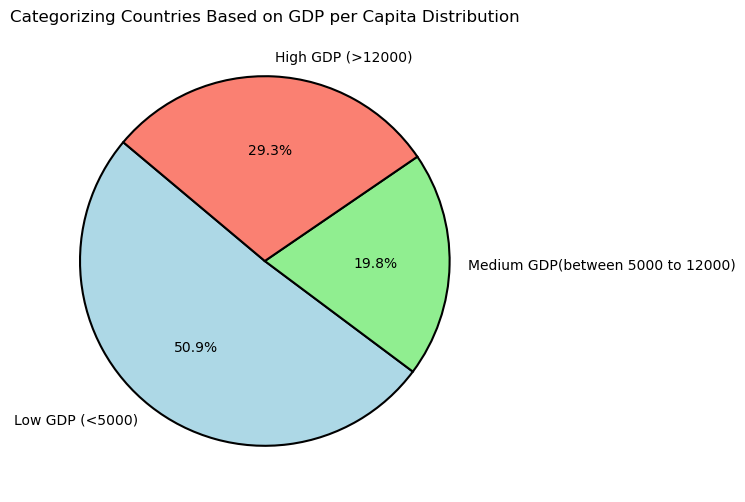

In [71]:
distribution_of_gdp_plot(data)